<h1>HOUSE PRICE PRIDICTION</h1>

<h3>Importing Libraries</h3>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error

<h3>Load Datasets :</h3>
<p>We can load the dataset by adding the path of dataset from the directory. And we intialize the dataset into variable as following.</p>

In [5]:
df = pd.read_csv("Housing.csv")
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


<h3>Get Info :</h3>
<p>We can get the information of dataset by using the function of pandas libarary named "pd.info(dataframe_name)".</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<h3>Describing Dataset : </h3>
<p>We can describe the standard deviation, average, number of count for each feature and minimum and maximum values of dataset.<br>By using pandas library function named "pd.describe()".</p>

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


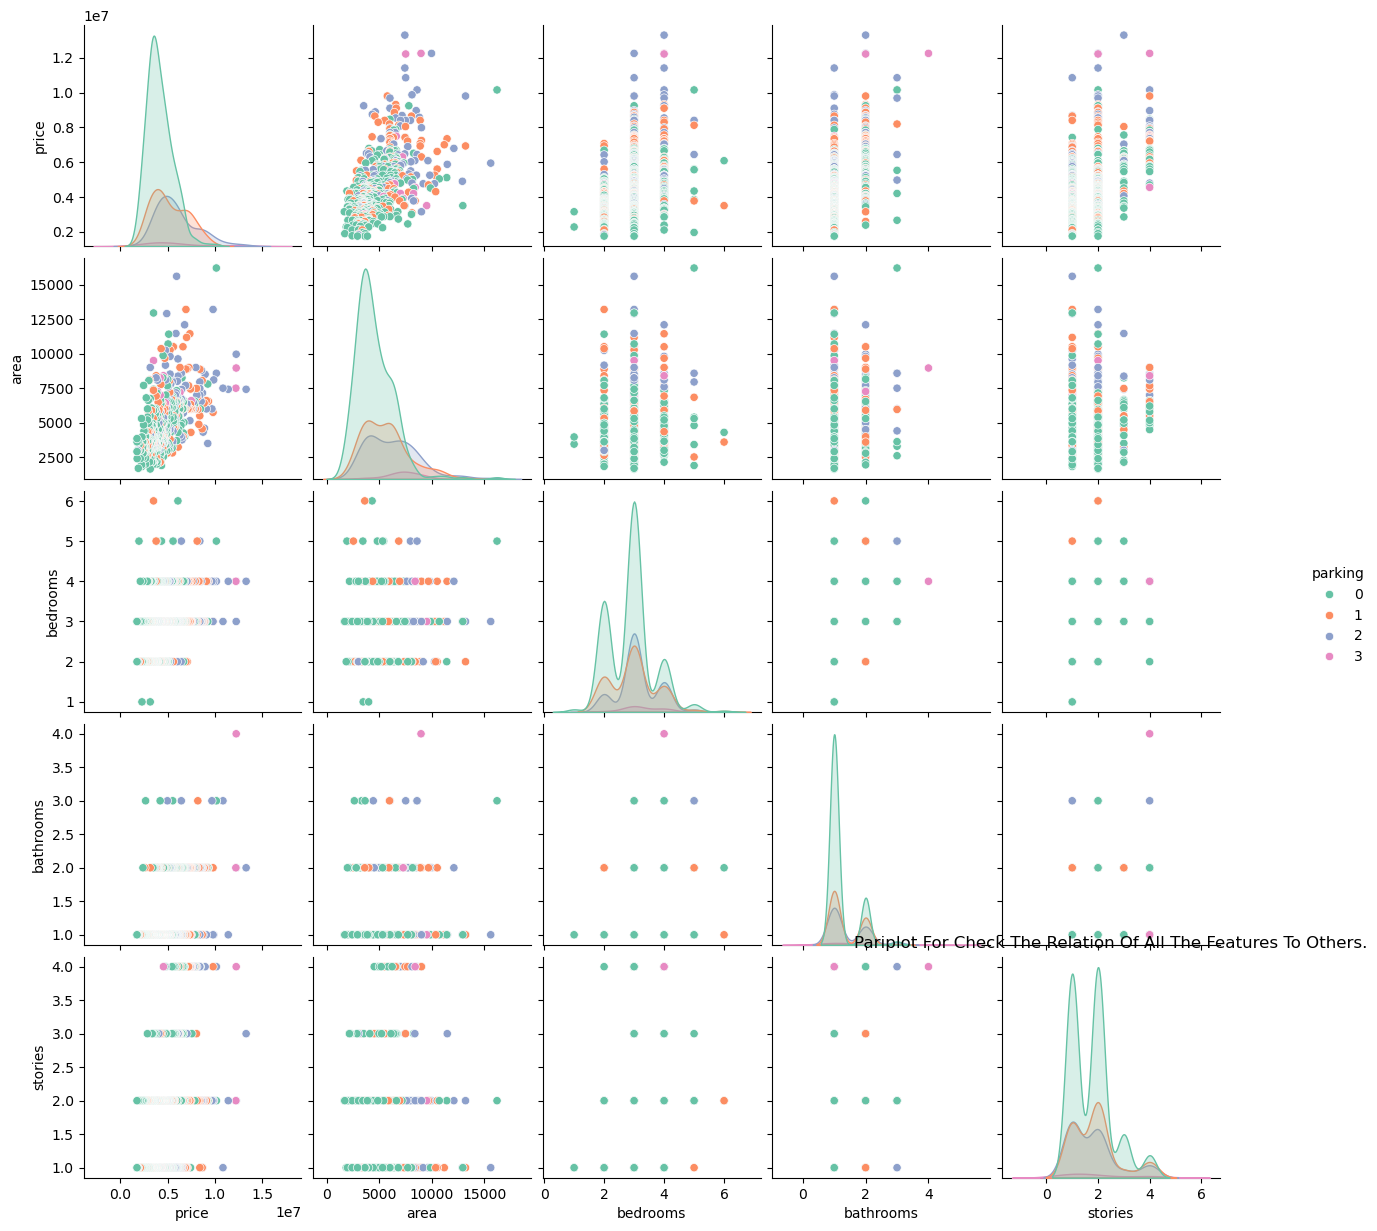

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df, hue= 'parking', palette='Set2')
plt.title("Pariplot For Check The Relation Of All The Features To Others.")
plt.savefig("pair_plot.png")
plt.show()

In [1]:
plt.scatter(df.area, df.price, marker=".", color="r")
plt.xlabel("Area")
plt.ylabel("Price")
plt.savefig("Scatter_plot.png")
plt.show()

NameError: name 'plt' is not defined

<h3>Encoding Dataset Features</h3>
We convert the data type of features by encoders as i will use LabelEncoder function of sklearn.We convert the data types of features with numeric form.
Because regression models use only and work only on numeric features.

In [ ]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

<h3>Correlated Features :</h3>
<p>We can find out the correlation by using "pd.corr()" for check the relation with target feature.</p>

In [ ]:
print(df.corr()["price"].abs().sort_values(ascending=False))

In [ ]:
print(df.isnull().sum())

<h3>To Check And Remove The Duplication Of Data From Dataset.</h3>

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
sns.boxplot(df['price'])
plt.title("Price Outlier Check")
plt.show()

<h3>Training And Testing Spliting</h3>

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Scalling The Input Features</h3>

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<h3>Linear Regresion Model Training</h3>

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
from sklearn.svm import SVC
svm_model= SVC()
svm_model.fit(x_train , y_train)

<h3>Predict Test The Model For Values</h3>

In [ ]:
# predictoin for LInear Regression
y_pred= model.predict(x_test)

<h3>Linear Regression MOdel Evaluation</h3>

In [ ]:
print("Linear Regression Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()